In [30]:
from random import randint, gauss, uniform
from matplotlib.pyplot import hist, show, xlim
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [43]:
#DEFINING CONSTANT VALUES FOR THE SIMULATION
#You can set these parameter as you wish, simulation will work properly
    
ROOM_CAPACITY = 40

CGRT_MIN = 7    #Cabbages goes rotten time -> minimum value for uniform distribution 
CGRT_MAX = 12   #Cabbages goes rotten time -> maximum value for uniform distribution 

CAAT_MIN = 1     #Cabbage arrival time-> minimum value 
CAAT_MAX = 15    #Cabbage arrival time-> maximum value 

CUAT_MIN = 0     #Customer arrival time-> minimum value
CUAT_MAX = 3     #Customer arrival time-> maximum value


In [175]:


class Event:
    def __init__(self, name, time, cabbageID):
        self.name = name
        self.time = time
        self.cabbageID = cabbageID
         

class des:    
    
    #Constructor
    def __init__(self, numberOfCustomers, initialNumberOfCabbages):
        self.numberOfCustomers = numberOfCustomers
        self.numberOfCabbages = initialNumberOfCabbages
        self.cabbageID = 0
        self.numberOfCabbagesInTime = []
        self.roomCapacity = ROOM_CAPACITY
        self.rottenCabbages = 0
        self.happyCustomer = 0
        self.unhappyCustomer = 0
        self.roomCapacityExceeded = 0
        
        
        self.cabbagesInStock = []  # This array contains the IDs of the cabbages in stock
        self.eventList = []        # Future event list
        
        for i in range(0, initialNumberOfCabbages):
            self.cabbageID += 1
            self.eventList.append(Event("cabbage expires", uniform(CGRT_MIN,CGRT_MAX), self.cabbageID))
            self.cabbagesInStock.append(self.cabbageID)
            self.sortEventsByTime()
        self.numberOfCabbagesInTime.append((0, self.numberOfCabbages)) 
    
    #Destructor
    def __del__(self):
        self.numberOfCabbagesInTime.clear()
        self.eventList.clear()
        self.cabbagesInStock.clear()
    
    
    def sellOneCabbagePickedRandomly(self):
        randomIndex = 0
        #print("STOCK =",self.cabbagesInStock)
        if(len(self.cabbagesInStock)>1):
            randomIndex = randint(0, len(self.cabbagesInStock)-1)
            
        removedID = self.cabbagesInStock[randomIndex]
        #print("Removed ID =",removedID)
        self.cabbagesInStock.pop(randomIndex)
        
        #Remove this cabbage's expire event from the future event list
        eventIndex = -1
        for i in range(0, len(self.eventList)):
            if(self.eventList[i].cabbageID == removedID):
                eventIndex = i
                break
        if(eventIndex > -1):
            self.eventList.pop(eventIndex)
            self.sortEventsByTime()
        else:
            print("UNEXPECTED ERROR OCCURED")
    
    
    def sortEventsByTime(self):
        self.eventList = sorted(self.eventList, key=lambda Event: Event.time) 
        
                     
    
    def handleEvents(self, event):
        if(event.name == "customer arriving/shopping/leaving"):
            if(self.numberOfCabbages>0):
                #Sell a cabbage
                self.sellOneCabbagePickedRandomly()
                self.happyCustomer += 1
                self.numberOfCabbages -= 1
                self.numberOfCabbagesInTime.append((event.time, self.numberOfCabbages))
                
                #Reorder a cabbage
                self.eventList.append(Event("cabbage arrives",event.time+uniform(CAAT_MIN,CAAT_MAX),-1))
                self.sortEventsByTime()
                
            else:
                self.unhappyCustomer += 1
            
            #Add next customer event to the list   
            self.eventList.append(Event("customer arriving/shopping/leaving", event.time+uniform(CUAT_MIN,CUAT_MAX),-1))
            self.sortEventsByTime()
            
        elif(event.name == "cabbage expires"):
            removingIndex = self.cabbagesInStock.index(event.cabbageID)
            self.cabbagesInStock.pop(removingIndex)
            self.numberOfCabbages -=1
            self.rottenCabbages += 1
            self.numberOfCabbagesInTime.append((event.time, self.numberOfCabbages))
            
            #Reorder a cabbage
            self.eventList.append(Event("cabbage arrives",event.time+uniform(CAAT_MIN,CAAT_MAX),-1))
            self.sortEventsByTime()
            
           
            
        elif(event.name == "cabbage arrives"):
            if(len(self.cabbagesInStock) < ROOM_CAPACITY):
                self.cabbageID += 1
                self.cabbagesInStock.append(self.cabbageID)
                self.numberOfCabbages += 1
                self.eventList.append(Event("cabbage expires",event.time+uniform(CGRT_MIN,CGRT_MAX), self.cabbageID))
                self.sortEventsByTime()
                self.numberOfCabbagesInTime.append((event.time, self.numberOfCabbages))
            else:
                self.roomCapacityExceeded += 1
            
            
    
    #This method simulates all of the events and returns average number of cabbages in stock
    def simulate(self):
        self.eventList.append(Event("customer arriving/shopping/leaving",uniform(CUAT_MIN,CUAT_MAX),-1))
        self.sortEventsByTime()
        while(self.happyCustomer+self.unhappyCustomer < self.numberOfCustomers):
            self.handleEvents(self.eventList[0])
            self.eventList.pop(0)
            self.sortEventsByTime()
        
        
        resultList = []
        resultList.append(self.numberOfCabbages)
        resultList.append(self.happyCustomer)
        resultList.append(self.unhappyCustomer)
        resultList.append(self.rottenCabbages)
        resultList.append(self.roomCapacityExceeded)
        return resultList
        
     
    #This method prints the graph that shows changes in number of cabbages for events
    def printGraph(self):
        print("Number of remaining cabbages =",self.numberOfCabbages)
        print("Number of happy customers =",self.happyCustomer)
        print("Number of unhappy customers =",self.unhappyCustomer)
        print("Number of rotten cabbages =",self.rottenCabbages)
        print("Capacity exceeded =",self.roomCapacityExceeded)
        
        timeValues, cabbageValues = zip(*self.numberOfCabbagesInTime)
        plt.plot(timeValues, cabbageValues)
        plt.title('SIMULATION GRAPH')
        plt.xlabel('Days')
        plt.ylabel('Number of Cabbages in Stock')
        show()
            
    

Number of remaining cabbages = 4
Number of happy customers = 999
Number of unhappy customers = 1
Number of rotten cabbages = 432
Capacity exceeded = 0


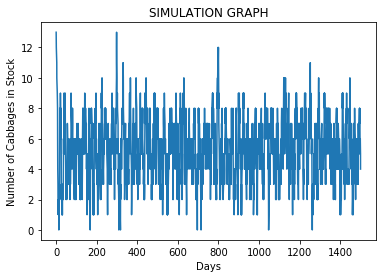

In [228]:
# Testing simulation to make sure that it is working
#1000 is number of customers to terminate the simulation and 13 is the initial number of cabbages

simulation = des(1000,13)  
simulation.simulate()
simulation.printGraph()


In [229]:
# Simulating N times to find the expected value of unhappy customers

def findExpectedValueOfUnhappyCustomers(N, customerLimit, initialValue):
    totalValue = 0
    for i in range(0,N):
        simulationObject= des(customerLimit, initialValue)
        totalValue += (simulationObject.simulate())[2];  #unhappy customers at index 2 of the return value 
        
    return totalValue/N

In [230]:
# Testing the function with simulation ,which has 1000 customers for termination criteria of simulation 
# and has 14 initial cabbages, 250 times
# Note: Function takes approximately 10 seconds to finish calculations

simResult = findExpectedValueOfUnhappyCustomers(250,1000,13)
print("Expected value of unhappy customers is",simResult,"for 1000 customers with initial ",14," cabbages")


Expected value of unhappy customers is 3.78 for 1000 customers with initial  14  cabbages


In [237]:
# Writing a function to give me suggestion about what should be the initial number of cabbages
# numberOfCustomers is the first parameter(which is the termination criteria of the simulation) of function 
# unhappyCustomerMax is second parameter(which is the upper limit of expected number of unhappy customers) of function

SIMULATE_N_TIMES = 250 #You can increase this value to get more accurate results, or you can decrease it to get fast results but less acurate

def giveMeSuggestion(numberOfCustomers, unhappyCustomerMax):
    for i in range(0,40):
        if(findExpectedValueOfUnhappyCustomers(SIMULATE_N_TIMES,numberOfCustomers,i) < unhappyCustomerMax):
            return i

In [ ]:
# Finding the optimum number of initial cabbages by using giveMeSuggestion function
# NOTE: This function takes approximately 1-2 minutes

unhappyCustomersMax = 3
suggestion = giveMeSuggestion(1000,unhappyCustomersMax)
print("You should stock",suggestion,"cabbages initially to make sure that expected number of unhappy customers is less than",unhappyCustomersMax, ",also to minimize the number of rotten cabbages.")